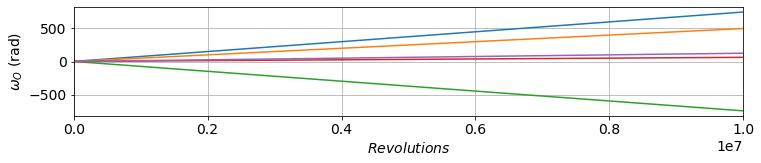

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Constant values
# Mass of the central object
m_3 = 1*10**7*2*10**(30)

# Total mass of the inner orbit M=m_1+m_2
M = 20*2*10**(30)
m_1=10*2*10**(30)
m_2=10*2*10**(30)
# Mass of the perturbing body in geometric unitsm=GM/c^2 
m = 0.1*2*10**(30)
c=3*10**8
G=6.674*10**(-11)
# Semi-major axis a of the inner and outer orbits
#a_I = 1
#a_O = 1*10**5
a_I = 1*1.496*10**(11)
a_O = 1*10**5*1.496*10**(11)
#PPN parameters



# Contributions to orbital elements per turn
def D_e_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    De_I = (m_3*15*np.pi*a_I**3*e_I*(1-e_I**2)**(1/2))/(16*a_O**3*(1-e_O**2)**(3/2)*M)*(np.sin(iota_O)**2*\
    (np.cos(2*iota_I)+3)*np.sin(2*omega_I)*np.cos(2*(Omega_I-Omega_O))+4*np.sin(iota_O)**2*np.cos(iota_I)*np.cos(2*omega_I)*\
    np.sin(2*(Omega_I-Omega_O))-4*np.sin(2*iota_O)*np.sin(iota_I)*np.cos(2*omega_I)*np.sin(Omega_I-Omega_O)-2*\
    np.sin(2*iota_I)*np.sin(2*iota_O)*np.sin(2*omega_I)*np.cos(Omega_I-Omega_O)+np.sin(iota_I)**2*(3*np.cos(2*iota_O)+1)*\
    np.sin(2*omega_I))
    return De_I

def D_iota_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    Diota_I = (m_3*3*np.pi*a_I**3)/(4*a_O**3*(1-e_O**2)**(3/2)*(1-e_I**2)**(1/2)*M)*(np.sin(iota_I)*\
    np.sin(iota_O)*np.cos(Omega_I-Omega_O)+np.cos(iota_I)*np.cos(iota_O))*(np.sin(iota_O)*np.sin(Omega_I-Omega_O)*\
    (5*e_I**2*np.cos(2*omega_I)+3*e_I**2+2)+5*e_I**2*np.sin(2*omega_I)*(np.sin(iota_O)*\
    np.cos(iota_I)*np.cos(Omega_I-Omega_O)-np.sin(iota_I)*np.cos(iota_O)))
    return Diota_I

def D_Omega_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    DOmega_I  =(m_3*3*np.pi*a_I**3)/(np.sin(iota_I)*4*a_O**3*(1-e_O**2)**(3/2)*(1-e_I**2)**(1/2)*M)*(np.sin(iota_O)*\
    np.sin(iota_I)*np.cos(Omega_I-Omega_O)+np.cos(iota_O)*np.cos(iota_I))*(5*e_I**2*np.sin(iota_O)*np.sin(2*omega_I)*\
    np.sin(Omega_I-Omega_O)+(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)*(np.sin(iota_I)*np.cos(iota_O)-np.sin(iota_O)*\
    np.cos(iota_I)*np.cos(Omega_I-Omega_O)))
    return DOmega_I

def D_omega_I(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O, gamma,beta):
    Domega_I =  (m_3*3*np.pi*a_I**3*(1-e_I**2)**(1/2))/(8*a_O**3*(1-e_O**2)**(3/2)*M)*(10*np.sin(iota_I)*\
    np.sin(2*iota_O)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)+np.sin(iota_O)**2*np.cos(2*(Omega_I-Omega_O))*\
    (2*np.sin(iota_I)**2*(4-5*np.cos(omega_I)**2)+20*np.cos(omega_I)**2-10)-10*np.sin(iota_O)**2*np.cos(iota_I)*\
    np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))+np.sin(2*iota_I)*np.sin(2*iota_O)*(3-5*np.cos(2*omega_I))*\
    np.cos(Omega_I-Omega_O)+(3*np.cos(2*iota_O)+1)*(np.sin(iota_I)**2*(5*np.cos(omega_I)**2-4)+1))-\
    (m_3*3*np.pi*a_I**3*np.cos(iota_I))/(np.sin(iota_I)*4*a_O**3*(1-e_O**2)**(3/2)*(1-e_I**2)**(1/2)*M)*(np.sin(iota_O)*\
    np.sin(iota_I)*np.cos(Omega_I-Omega_O)+np.cos(iota_O)*np.cos(iota_I))*(5*e_I**2*np.sin(iota_O)*np.sin(2*omega_I)*\
    np.sin(Omega_I-Omega_O)+(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)*(np.sin(iota_I)*np.cos(iota_O)-np.sin(iota_O)*\
    np.cos(iota_I)*np.cos(Omega_I-Omega_O)))+2*np.pi*G*M/(c**2*a_I*(1-e_I**2))*(2*(1+gamma)-beta)
    return Domega_I

def D_iota_O(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    Diota_O = (m_3**(1/2)*m_1*m_2*3*np.pi*a_I**(7/2))/(4*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*(np.sin(iota_O)*\
    (np.sin(2*(Omega_I-Omega_O))*(np.sin(iota_I)**2*\
    (-5*e_I**2*np.cos(omega_I)**2+4*e_I**2+1)+10*e_I**2*np.cos(omega_I)**2-5*e_I**2)+5*e_I**2*np.cos(iota_I)*\
    np.sin(2*omega_I)*np.cos(2*(Omega_I-Omega_O)))+np.cos(iota_O)*(np.sin(2*iota_I)*np.sin(Omega_I-Omega_O)*\
    (-5*e_I**2*np.cos(omega_I)**2+4*e_I**2+1)-5*e_I**2*np.sin(iota_I)*np.sin(2*omega_I)*np.cos(Omega_I-Omega_O))) 
    return Diota_O

def D_Omega_O(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O):
    DOmega_O = (m_3**(1/2)*m_1*m_2*3*np.pi*a_I**(7/2))/(np.sin(iota_O)*8*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*\
    (np.sin(2*iota_O)*((1/2)*np.sin(iota_I)**2*(np.cos(2*(Omega_I-Omega_O))+3)*(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)+\
    5*e_I**2*np.cos(iota_I)*np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))-5*e_I**2*np.cos(2*omega_I)*\
    np.cos(2*(Omega_I-Omega_O))+3*e_I**2+2)+np.cos(2*iota_O)*(np.sin(2*iota_I)*np.cos(Omega_I-Omega_O)*\
    (5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)-10*e_I**2*np.sin(iota_I)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)))  
    return DOmega_O

def D_omega_O(e_I, omega_I, iota_I, Omega_I, Omega_O, iota_O, gamma,beta):
    Domega_O =(3*np.pi*m_3**(1/2)*m_1*m_2*a_I**(7/2))/(16*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*(30*e_I**2*np.sin(iota_I)*\
    np.sin(2*iota_O)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)-30*e_I**2*np.sin(iota_O)**2*np.cos(iota_O)*\
    np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))+3*np.sin(iota_O)**2*np.cos(2*(Omega_I-Omega_O))*(np.sin(iota_I)**2*\
    (-5*e_I**2*np.cos(2*omega_I)+3*e_I**2+2)+10*e_I**2*np.cos(2*omega_I))+3*np.sin(2*iota_I)*np.sin(2*iota_O)*\
    np.cos(Omega_I-Omega_O)*(-5*e_I**2*np.cos(2*omega_I)+3*e_I**2+2)+(2-3*np.sin(iota_O)**2)*(np.sin(iota_I)**2*\
    (15*e_I**2*np.cos(2*omega_I)-9*e_I**2-6)+6*e_I**2+4))-\
    (np.cos(iota_O)*m_3**(1/2)*m_1*m_2*3*np.pi*a_I**(7/2))/(np.sin(iota_O)*8*a_O**(7/2)*(1-e_O**2)**2*M**(5/2))*\
    (np.sin(2*iota_O)*((1/2)*np.sin(iota_I)**2*(np.cos(2*(Omega_I-Omega_O))+3)*(5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)+\
    5*e_I**2*np.cos(iota_I)*np.sin(2*omega_I)*np.sin(2*(Omega_I-Omega_O))-5*e_I**2*np.cos(2*omega_I)*\
    np.cos(2*(Omega_I-Omega_O))+3*e_I**2+2)+np.cos(2*iota_O)*(np.sin(2*iota_I)*np.cos(Omega_I-Omega_O)*\
    (5*e_I**2*np.cos(2*omega_I)-3*e_I**2-2)-10*e_I**2*np.sin(iota_I)*np.sin(2*omega_I)*np.sin(Omega_I-Omega_O)))+\
    6*np.pi*G*m_3/(c**2*a_O*(1-e_O**2))*(2*(1+gamma)-beta)
    return Domega_O

# Initial values of the orbital elements for two orbits
e0_I1 = 0.3
omega0_I1 = np.pi/3
iota0_I1 =np.pi/3
Omega0_I1 = np.pi/32 
e_O = 0.5
Omega0_O1 = np.pi/6
iota0_O1 =np.pi/12
omega0_O1 = np.pi/3
e0_I2 = 0.3
omega0_I2 = np.pi/3
iota0_I2 =np.pi/3
Omega0_I2 = np.pi/32 
Omega0_O2 = np.pi/6
iota0_O2 =np.pi/12
omega0_O2 = np.pi/3
e0_I3 = 0.3
omega0_I3 = np.pi/3
iota0_I3 =np.pi/3
Omega0_I3 = np.pi/32 
Omega0_O3 = np.pi/6
iota0_O3 =np.pi/12
omega0_O3 = np.pi/3
e0_I4 = 0.3
omega0_I4 = np.pi/3
iota0_I4 =np.pi/3
Omega0_I4 = np.pi/32 
Omega0_O4 = np.pi/6
iota0_O4 =np.pi/12
omega0_O4 = np.pi/3
e0_I5 = 0.3
omega0_I5 = np.pi/3
iota0_I5 =np.pi/3
Omega0_I5 = np.pi/32 
Omega0_O5 = np.pi/6
iota0_O5 =np.pi/12
omega0_O5 = np.pi/3

#PPN Parameters
beta1=1
beta2=0
beta3=1
beta4=-1/4
beta5=-1/2
gamma1=1
gamma2=0
gamma3=-2
gamma4=-1
gamma5=-1


# Turns
n = 10000000
t = np.arange(n)

e_I1 = np.zeros(n)
omega_I1 = np.zeros(n)
iota_I1 = np.zeros(n)
Omega_I1 = np.zeros(n)
Omega_O1 = np.zeros(n)
iota_O1 = np.zeros(n)
omega_O1 = np.zeros(n)
e_I2 = np.zeros(n)
omega_I2 = np.zeros(n)
iota_I2 = np.zeros(n)
Omega_I2 = np.zeros(n)
Omega_O2 = np.zeros(n)
iota_O2 = np.zeros(n)
omega_O2 = np.zeros(n)
e_I3 = np.zeros(n)
omega_I3 = np.zeros(n)
iota_I3 = np.zeros(n)
Omega_I3 = np.zeros(n)
Omega_O3 = np.zeros(n)
iota_O3 = np.zeros(n)
omega_O3 = np.zeros(n)
e_I4 = np.zeros(n)
omega_I4 = np.zeros(n)
iota_I4 = np.zeros(n)
Omega_I4 = np.zeros(n)
Omega_O4 = np.zeros(n)
iota_O4 = np.zeros(n)
omega_O4 = np.zeros(n)
e_I5 = np.zeros(n)
omega_I5 = np.zeros(n)
iota_I5 = np.zeros(n)
Omega_I5 = np.zeros(n)
Omega_O5 = np.zeros(n)
iota_O5 = np.zeros(n)
omega_O5 = np.zeros(n)

#Iteration cycle
for i in t:
    e_I1[i] = e0_I1
    e_I2[i] = e0_I2
    e_I3[i] = e0_I3
    e_I4[i] = e0_I4
    e_I5[i] = e0_I5
    omega_I1[i] = omega0_I1
    omega_I2[i] = omega0_I2
    omega_I3[i] = omega0_I3
    omega_I4[i] = omega0_I4
    omega_I5[i] = omega0_I5
    iota_I1[i] = iota0_I1
    iota_I2[i] = iota0_I2
    iota_I3[i] = iota0_I3
    iota_I4[i] = iota0_I4
    iota_I5[i] = iota0_I5
    Omega_I1[i] = Omega0_I1
    Omega_I2[i] = Omega0_I2
    Omega_I3[i] = Omega0_I3
    Omega_I4[i] = Omega0_I4
    Omega_I5[i] = Omega0_I5
    iota_O1[i] = iota0_O1
    iota_O2[i] = iota0_O2
    iota_O3[i] = iota0_O3
    iota_O4[i] = iota0_O4
    iota_O5[i] = iota0_O5
    Omega_O1[i] = Omega0_O1
    Omega_O2[i] = Omega0_O2
    Omega_O3[i] = Omega0_O3
    Omega_O4[i] = Omega0_O4
    Omega_O5[i] = Omega0_O5
    omega_O1[i] = omega0_O1
    omega_O2[i] = omega0_O2
    omega_O3[i] = omega0_O3
    omega_O4[i] = omega0_O4
    omega_O5[i] = omega0_O5
    e0_I1 = e0_I1 + D_e_I(e0_I1, omega0_I1, iota0_I1, Omega0_I1, Omega0_O1, iota0_O1)
    e0_I2 = e0_I2 + D_e_I(e0_I2, omega0_I2, iota0_I2, Omega0_I2, Omega0_O2, iota0_O2)
    e0_I3 = e0_I3 + D_e_I(e0_I3, omega0_I3, iota0_I3, Omega0_I3, Omega0_O3, iota0_O3)
    e0_I4 = e0_I4 + D_e_I(e0_I4, omega0_I4, iota0_I4, Omega0_I4, Omega0_O4, iota0_O4)
    e0_I5 = e0_I5 + D_e_I(e0_I5, omega0_I5, iota0_I5, Omega0_I5, Omega0_O5, iota0_O5)
    omega0_I1 = omega0_I1 + D_omega_I(e0_I1, omega0_I1, iota0_I1, Omega0_I1, Omega0_O1, iota0_O1, gamma1, beta1)
    omega0_I2 = omega0_I2 + D_omega_I(e0_I2, omega0_I2, iota0_I2, Omega0_I2, Omega0_O2, iota0_O2, gamma2, beta2)
    omega0_I3 = omega0_I3 + D_omega_I(e0_I3, omega0_I3, iota0_I3, Omega0_I3, Omega0_O3, iota0_O3, gamma3, beta3)
    omega0_I4 = omega0_I4 + D_omega_I(e0_I4, omega0_I4, iota0_I4, Omega0_I4, Omega0_O4, iota0_O4, gamma4, beta4)
    omega0_I5 = omega0_I5 + D_omega_I(e0_I5, omega0_I5, iota0_I5, Omega0_I5, Omega0_O5, iota0_O5, gamma5, beta5)
    iota0_I1 = iota0_I1 + D_iota_I(e0_I1, omega0_I1, iota0_I1, Omega0_I1, Omega0_O1, iota0_O1)
    iota0_I2 = iota0_I2 + D_iota_I(e0_I2, omega0_I2, iota0_I2, Omega0_I2, Omega0_O2, iota0_O2)
    iota0_I3 = iota0_I3 + D_iota_I(e0_I3, omega0_I3, iota0_I3, Omega0_I3, Omega0_O3, iota0_O3)
    iota0_I4 = iota0_I4 + D_iota_I(e0_I4, omega0_I4, iota0_I4, Omega0_I4, Omega0_O4, iota0_O4)
    iota0_I5 = iota0_I5 + D_iota_I(e0_I5, omega0_I5, iota0_I5, Omega0_I5, Omega0_O5, iota0_O5)
    iota0_O1 = iota0_O1 + D_iota_O(e0_I1, omega0_I1, iota0_I1, Omega0_I1, Omega0_O1, iota0_O1)
    iota0_O2 = iota0_O2 + D_iota_O(e0_I2, omega0_I2, iota0_I2, Omega0_I2, Omega0_O2, iota0_O2)
    iota0_O3 = iota0_O3 + D_iota_O(e0_I3, omega0_I3, iota0_I3, Omega0_I3, Omega0_O3, iota0_O3)
    iota0_O4 = iota0_O4 + D_iota_O(e0_I4, omega0_I4, iota0_I4, Omega0_I4, Omega0_O4, iota0_O4)
    iota0_O5 = iota0_O5 + D_iota_O(e0_I5, omega0_I5, iota0_I5, Omega0_I5, Omega0_O5, iota0_O5)
    Omega0_I1 = Omega0_I1 + D_Omega_I(e0_I1, omega0_I1, iota0_I1, Omega0_I1, Omega0_O1, iota0_O1)
    Omega0_I2 = Omega0_I2 + D_Omega_I(e0_I2, omega0_I2, iota0_I2, Omega0_I2, Omega0_O2, iota0_O2)
    Omega0_I3 = Omega0_I3 + D_Omega_I(e0_I3, omega0_I3, iota0_I3, Omega0_I3, Omega0_O3, iota0_O3)
    Omega0_I4 = Omega0_I4 + D_Omega_I(e0_I4, omega0_I4, iota0_I4, Omega0_I4, Omega0_O4, iota0_O4)
    Omega0_I5 = Omega0_I5 + D_Omega_I(e0_I5, omega0_I5, iota0_I5, Omega0_I5, Omega0_O5, iota0_O5)
    Omega0_O1 = Omega0_O1 + D_Omega_O(e0_I1, omega0_I1, iota0_I1, Omega0_I1, Omega0_O1, iota0_O1)
    Omega0_O2 = Omega0_O2 + D_Omega_O(e0_I2, omega0_I2, iota0_I2, Omega0_I2, Omega0_O2, iota0_O2)
    Omega0_O3 = Omega0_O3 + D_Omega_O(e0_I3, omega0_I3, iota0_I3, Omega0_I3, Omega0_O3, iota0_O3)
    Omega0_O4 = Omega0_O4 + D_Omega_O(e0_I4, omega0_I4, iota0_I4, Omega0_I4, Omega0_O4, iota0_O4)
    Omega0_O5 = Omega0_O5 + D_Omega_O(e0_I5, omega0_I5, iota0_I5, Omega0_I5, Omega0_O5, iota0_O5)
    omega0_O1 = omega0_O1 + D_omega_O(e0_I1, omega0_I1, iota0_I1, Omega0_I1, Omega0_O1, iota0_O1, gamma1, beta1)
    omega0_O2 = omega0_O2 + D_omega_O(e0_I2, omega0_I2, iota0_I2, Omega0_I2, Omega0_O2, iota0_O2, gamma2, beta2)
    omega0_O3 = omega0_O3 + D_omega_O(e0_I3, omega0_I3, iota0_I3, Omega0_I3, Omega0_O3, iota0_O3, gamma3, beta3)
    omega0_O4 = omega0_O4 + D_omega_O(e0_I4, omega0_I4, iota0_I4, Omega0_I4, Omega0_O4, iota0_O4, gamma4, beta4)
    omega0_O5 = omega0_O5 + D_omega_O(e0_I5, omega0_I5, iota0_I5, Omega0_I5, Omega0_O5, iota0_O5, gamma5, beta5)
    

#Plot of secular evolutions  

plt.rcParams.update({'font.size': 14})


plt.figure(figsize=(12,2))
plt.plot(t,omega_O1)
plt.plot(t,omega_O2)
plt.plot(t,omega_O3)
plt.plot(t,omega_O4)
plt.plot(t,omega_O5)
plt.grid()
plt.ylabel(r'$\omega_O$ (rad)')
plt.xlim(0,10000000)
plt.xlabel(r'$Revolutions$')
plt.savefig("secular97", dpi=300, bbox_inches='tight')
plt.show()